In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("housing.csv")

In [9]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [11]:
prices = df["MEDV"]
features = df.iloc[:, :-1]
number_of_rooms = df["RM"]
status = df["LSTAT"]

data exploration and visulazation

plot each of features against target varable

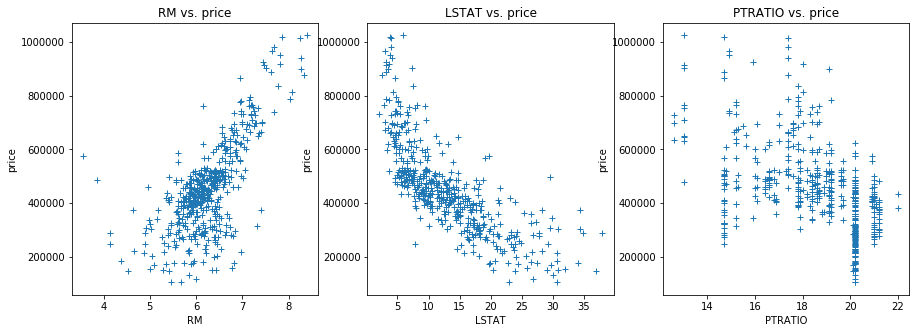

In [31]:
plt.figure(figsize = (15 ,5))
for i, col in enumerate(features.columns):
    plt.subplot(1,3, i+1)
    plt.plot(df[col], prices, "+")
    plt.title("{} vs. {}".format(col, "price"))
    plt.xlabel(col)
    plt.ylabel("price")

# Developing a model

splitting data into train, test
we use cross validation to tune the hyper parameter of our model, so we don;t need a separate validation data set

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 2, shuffle = True)

### Define a performance metric
we need a performance metrics to evaluate our model. There are several evaluation metrics for a regression problem:
- MSE : mean squared error
- RMSE: root mean squared error
- R^2: coefficient of determination

In [63]:
from sklearn.metrics import r2_score
def error(y_pred, y_test):
   
    r2 = r2_score(y_pred, y_test)
    print ("R^2 is : {}".format(r2))

## choosing a model

In [64]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 3)

In [65]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [66]:
y_pred = regressor.predict(X_test)

In [67]:
error(y_pred, y_test)

R^2 is : 0.6734302995870365


R^2 or coeffiecient of determination shows how much of variance in target variable can be explained by features. it ranges from 0 to 1. R^2 zero shows that your features can not explain the variance in target variable.
it is always a good practice to not rely on a single performance metrics.

In [ ]:
Evaluating the model performance

## Tuning the model

Tuning means find the optimal hyper-parameters for the model.There are 2 ways to find the best hyper parameters:
- Grid search
- Random search

### Grid Search

In [1]:
from sklearn.grid_search import GridSearchCV

/home/ali/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ali/.local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
